In [4]:
# Importing the necessary packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [6]:
# Loading and Preparing the Data

df_train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst', header=None, sep=' ')
df_train_data.head(3)

,0,1,2,3,4,5,6,7,8,9
0,55,0,81,0,-6,11,25,88,64,4
1,56,0,96,0,52,-4,40,44,4,4
2,50,-1,89,-7,50,0,39,40,2,1


In [9]:
df_train_data [9] = np.where(df_train_data[9]==1,1,0)
X= df_train_data.drop([9],axis =1)
y= df_train_data[9]
X_train,X_test,y_train,y_test = train_test_split(X,y)
print('There are {:d} training samples and {:d} test samples'.format(X_train.shape[0],X_test.shape[0]))

There are 10875 training samples and 3625 test samples


In [10]:
X_train.head()

,0,1,2,3,4,5,6,7,8
13170,45,-1,77,0,44,-15,32,34,2
11026,53,1,78,0,52,-10,25,26,2
4629,55,0,92,0,8,-4,37,84,48
5859,38,0,83,0,36,-22,45,47,2
12858,44,0,88,0,44,7,44,44,0


In [13]:
# Creating the model
lr = LogisticRegression(penalty = 'none', max_iter =1000)
lr.fit(X_train,y_train)
lr.coef_

array([[ 2.79167788e-01,  2.74241766e-03, -1.45895068e-01,
         3.19103721e-02, -6.74998556e-01, -3.64451673e-04,
         1.07663856e+00, -9.86592710e-01,  1.02591854e-01]])

In [14]:
# Calculating Accuracy

lr_score = lr.score(X_test,y_test)
print('Accuracy of Logistic Regression: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression: 0.967


In [15]:
# Dummy Classifier
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train,y_train)
round(dummy.score(X_test,y_test),3)

0.797

In [16]:
# Confusin Matrix
predictions = lr.predict(X_test)
confusion = confusion_matrix(y_test,predictions)
print(confusion)

[[ 660   75]
 [  45 2845]]


In [17]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

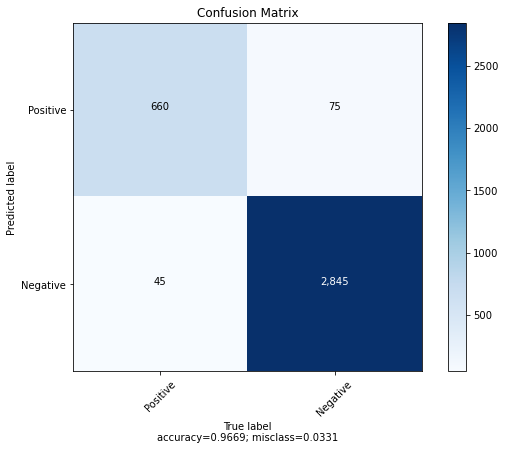

In [18]:
plot_confusion_matrix(cm=confusion,target_names = ['Positive','Negative'],title = 'Confusion Matrix',normalize = False)

In [24]:
# Calculating Metrics

accuracy = accuracy_score(y_test,predictions)
precision = precision_score(y_test,predictions)
recall = recall_score(y_test,predictions)
f1 = f1_score(y_test,predictions)
fbeta_precision = fbeta_score(y_test,predictions,beta =0.5)
fbeta_recall = fbeta_score(y_test,predictions,beta =2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('Fbeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.97
precision score: 0.97
Recall score: 0.98
F1 score: 0.98
Fbeta score favoring precision: 0.98
Fbeta score favoring recall: 0.98


In [25]:
# Printing a classification report

report = classification_report(y_test,predictions,target_names = ['Negative','Positive'])
print(report)

              precision    recall  f1-score   support

    Negative       0.94      0.90      0.92       735
    Positive       0.97      0.98      0.98      2890

    accuracy                           0.97      3625
   macro avg       0.96      0.94      0.95      3625
weighted avg       0.97      0.97      0.97      3625



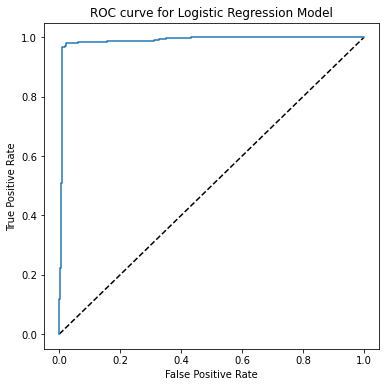

Area under the ROC curve:  0.990


In [27]:
# plotting ROC and calculating AUC
probs = lr.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,probs)
fig = plt.figure(figsize = (6,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

auc = roc_auc_score(y_test,probs)
print('Area under the ROC curve:  {:.3f}'.format(auc))

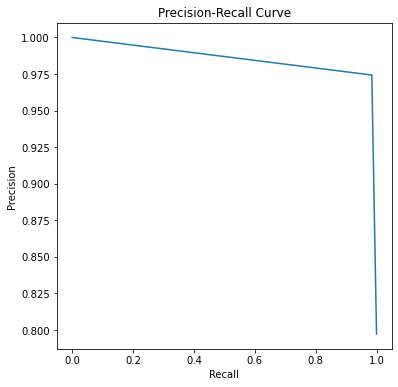

In [28]:
# Ploting the Precision-Recall Curve
pres,rec,thresholds = precision_recall_curve(y_test,predictions)
fig = plt.figure(figsize = (6,6))
plt.plot(rec,pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

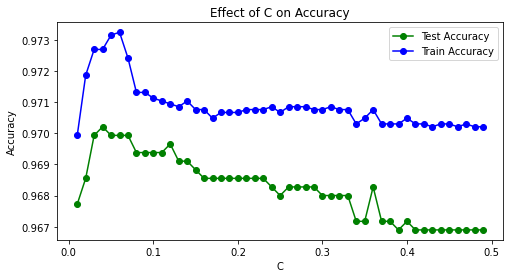

In [31]:
# Parameter Tuning
# Tuning the regularization parameter C using grid search

c_vals = np.arange(0.01, 0.5, 0.01)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(penalty='l2', C=c, max_iter=1000)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', marker = "o", label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', marker = "o", label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [33]:
best_test_accuracy = max(test_accuracy)

print(f'Best value for C: {c_vals[test_accuracy.index(best_test_accuracy)]}')
print(f'Best test accuracy: {round(best_test_accuracy,3)}')

Best value for C: 0.04
Best test accuracy: 0.97


In [34]:
# cross validation
clf = LogisticRegression(solver = 'lbfgs',max_iter = 1000)
cv_scores = cross_val_score(clf,X_train,y_train,cv=5)

print('Accuracy scores for the 5 folds: ',cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.97195402 0.96873563 0.97057471 0.97195402 0.96965517]
Mean cross validation score: 0.971
